## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [41]:
#reading teh data 
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [42]:
#printing num. of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [43]:
#printing num. of unique id's in the data set 
df.user_id.nunique()

290584

d. The proportion of users converted.

In [44]:
#mean or avg of people that are converted 
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [45]:
#finding missmatches for both criterea where new page is not treatment and vice versa 
miss1 = df.query('landing_page == "new_page" and group != "treatment"')
miss2 = df.query('group == "treatment" and landing_page != "new_page"')
miss1.shape[0] + miss2.shape[0]

3893

f. Do any of the rows have missing values?

In [46]:
#finding the number of null values 
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
#droping values for both missmatched criteriea above
df = df.drop(miss1.index)
df2 = df.drop(miss2.index)

In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
#printing the duplicated id 
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [51]:
#printing the row information
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
#removing the duplicated row
df2 = df2.drop(index=2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
#proportion of converts
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
#proportion of converts in the control
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
#proportion of converts in the treatment
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [56]:
#proprtion of people that recieved the new page 
newpages = df2.query('landing_page == "new_page"').shape[0]
newpages/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**I don't believe that the new page leads to more conversions due to the similarity of the proportions of coversion in both cases.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: P_new = P_old**   
**H1: P_new > P_old**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [57]:
#printing the mean of converted new pages under the null
p_new = df.converted.mean()
p_new

0.11964792343189198

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [58]:
#printing the mean of converted old pages under the null
p_old = df.converted.mean()
p_old

0.11964792343189198

c. What is $n_{new}$?

In [59]:
#printing the number of  new pages
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [60]:
#printing the number old pages
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [61]:
#sampling the df2 for new pages and findig their proportion
new_page_converted = np.random.choice([0,1],size = n_new, p = [1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [62]:
#sampling the df2 for old pages and findig their proportion
old_page_converted = np.random.choice([0,1],size = n_old, p = [1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [63]:
#printig the difference in distributions
new_page_converted.mean() - old_page_converted.mean()

-0.0007043051423006458

In [64]:
new = df2[df2.landing_page == 'new_page'].converted.mean()
old = df2[df2.landing_page == 'old_page'].converted.mean()
obs_diff = new - old
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [65]:
#sampling the distribution for the difference in proportions 10000 times 
np.random.seed(42)
p_diffs = []
for i in range(1000):
    new_page = np.random.choice([0,1],size = n_new, p = [1-p_new, p_new])
    old_page = np.random.choice([0,1],size = n_old, p = [1-p_old, p_old])
    p_diffs.append(new_page.mean() - old_page.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'distribution of differences')

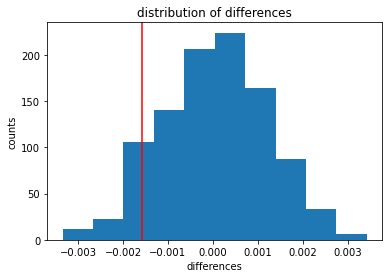

In [66]:
#converting the proportion differences to a numpy array and plotting the histogram
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(obs_diff, color ='red')
plt.xlabel('differences')
plt.ylabel('counts')
plt.title('distribution of differences')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [67]:
#printing the p-value
(p_diffs > obs_diff).mean()

0.913

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**this is the p value for the hypothesis test H0: P_new = P_old, H1: P_new > P_old and it indicates with great certainty that we fail to reject the null hypothesis since the p-value is very high so we can fail to reject the null on level up to 85% which is rediculous to set such a high level**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [68]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page == 'old_page']['converted'].sum()
convert_new = df2[df2.landing_page == 'new_page']['converted'].sum()
n_old = df2[df2.landing_page =='old_page'].shape[0]
n_new = df2[df2.landing_page =='new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [69]:
stat, pval = sm.stats.proportions_ztest(nobs = [n_new, n_old],count = [convert_new, convert_old], alternative ='larger')
print(pval)
print(stat)

0.9050583127590245
-1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the p-value indicates that difference in means is not greater than zero with very high certainty and the z score means that our value is 1.8 standard deviations less than the mean.They do agree with the tests we ran above that we fail to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [70]:
#making the intercept column and setting it to 1 also making the ab_page dummy variable
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page']) 
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
log = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:57:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**H_0:Beta_1 = 0, H_1:Beta_1 != 0   
the p-value in this regression is used to indicate if a variable is statistically significant in predicting another or not and here it indicates that ab_page is not statistically significant for predicting conversion and that means that the two landing pages have no significant difference in conversion rates**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**other factors might add new information that is not captured by the current data we have the ages of users for example or there country of origin, these might add predictive power to our regression model but they might also slow it down or be redundant and not add any value**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

### answer:
***no it does not have an impact on conversion as evidenced by its p-value as seen below** 


In [73]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [74]:
### Create the necessary dummy variables
#fitting a model using the new dummy variables alone 
df_new[['us','uk','ca']] = pd.get_dummies(df_new['country'])
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'uk', 'ca']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:               1.521e-05
Time:                        17:57:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
ca             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [75]:
df_new['uk_ab_page'] = df_new['uk']*df_new['ab_page']
df_new['ca_ab_page'] = df_new['ca']*df_new['ab_page']

In [79]:
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'uk_ab_page', 'ca_ab_page']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:               1.082e-05
Time:                        18:01:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
uk_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
ca_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

In [78]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,us,uk,ca,uk_ab_page,ca_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0


In [59]:
### Fit Your Linear Model And Obtain the Results
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'uk', 'ca']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:               2.324e-05
Time:                        23:09:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
uk             0.0506      0.028      1.784      0.074      -0.005       0.106
ca             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**in conclusion both the country variable and the ab_page variable didnt have any significant predictive power to effect our model and that means that the new web page statistically doesnt effect the conversion rate or improve on the old page also the country where the person is from has no significant effect on the conversion rate of the website 
In my point of view after seeing the data the new website is maybe too similar to old website and doesn't generate any extra conversions and in the country sections the reason why there isn't any difference in conversion for countries maybe down to the similarities in the countries displayed here they are all first world countries with similar cultures and languages and that might be a contributor in the data not showing any significant difference between them. Keeping the new website running is the best action in my opinion and the very least it didn't show any signs of detering customers and shuold be a waste of money and effort.**

**to further drive home my analysis I site the model with interaction terms fitted wich also showed no significant statistical predicting power**

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.